# Photometric Quantities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from IPython.display import Image

Luminous flux $\phi$, $[ \phi ]$ = lm (lumen)

Illuminance $E = \frac{d\phi}{dA}$, $[E]$ = lx (lux) 

Luminance $L = \frac{d\phi}{dA_S d\Omega}$ , $[L]$ = cd/m² (candela/m²) with $dA_S$ as apperant area and $d\Omega$ as solid angle.
See the following sketch!

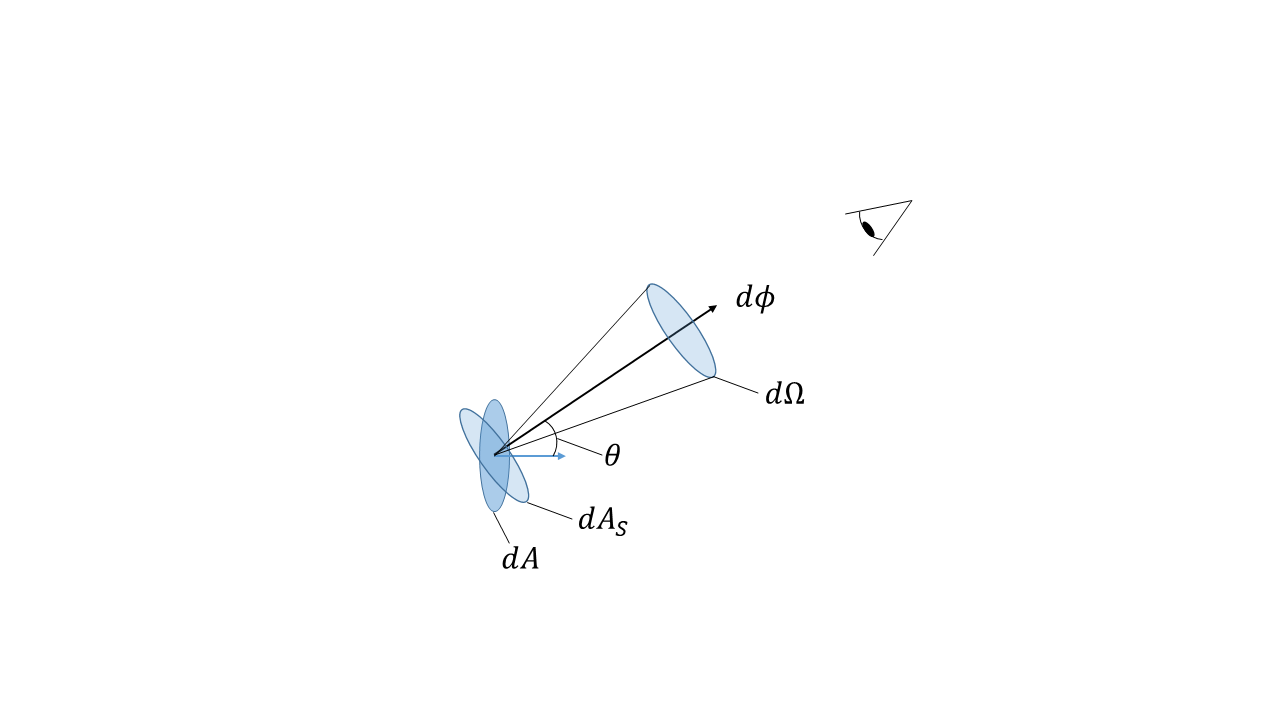

In [2]:
Image("L.png")

Show that the following symmetry condition applies with regard to the solid-angle-area products (see also the following sketch)!

$$
    dA_{1,S}\, d\Omega_2 = dA_{2,S} \, d\Omega_1
$$    

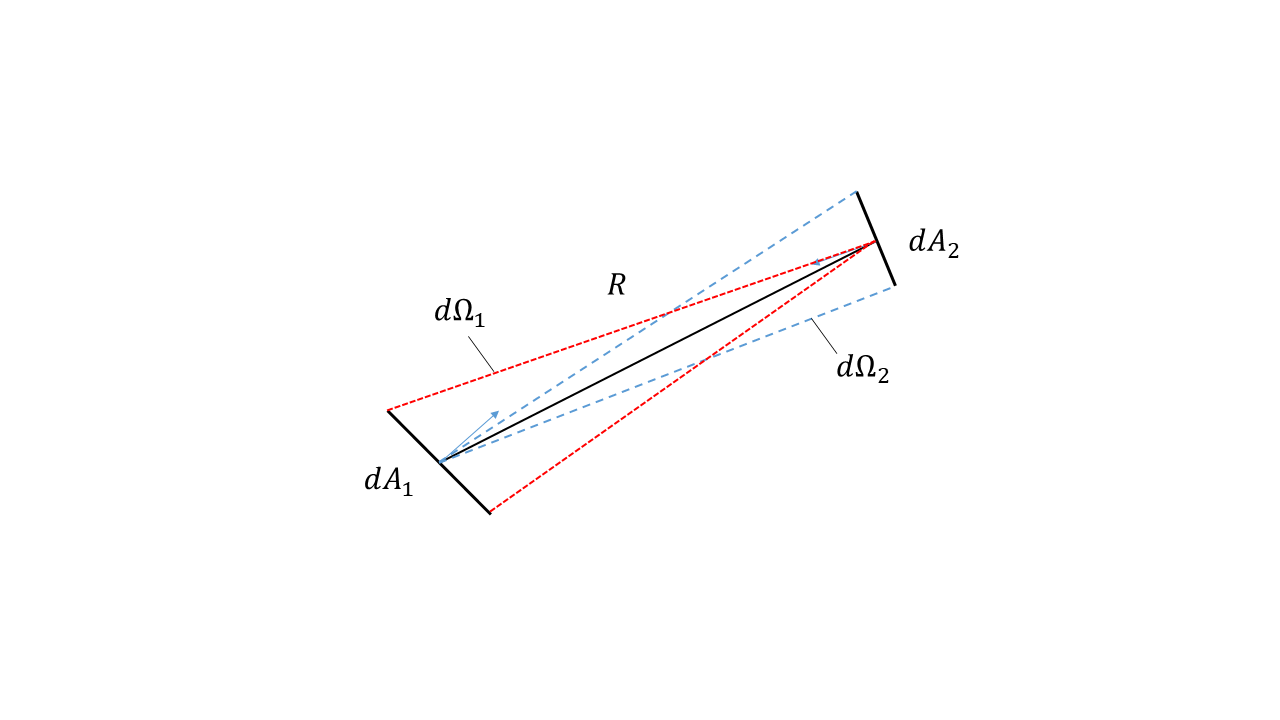

In [3]:
Image("SAO.png")

```{admonition} Questions
:class: full-width
The following drawing shows a sunlit façade. An internal venetian blind with a diffuse (Lambertian) transmission $\tau$ of 10% was used as glare protection.  

What is the luminance of the glare protection if the external illuminance $E$ is 50000 lx?

Show that the following general relationship exists.

$$
    L = \frac{\tau\, E}{\pi}
$$
```

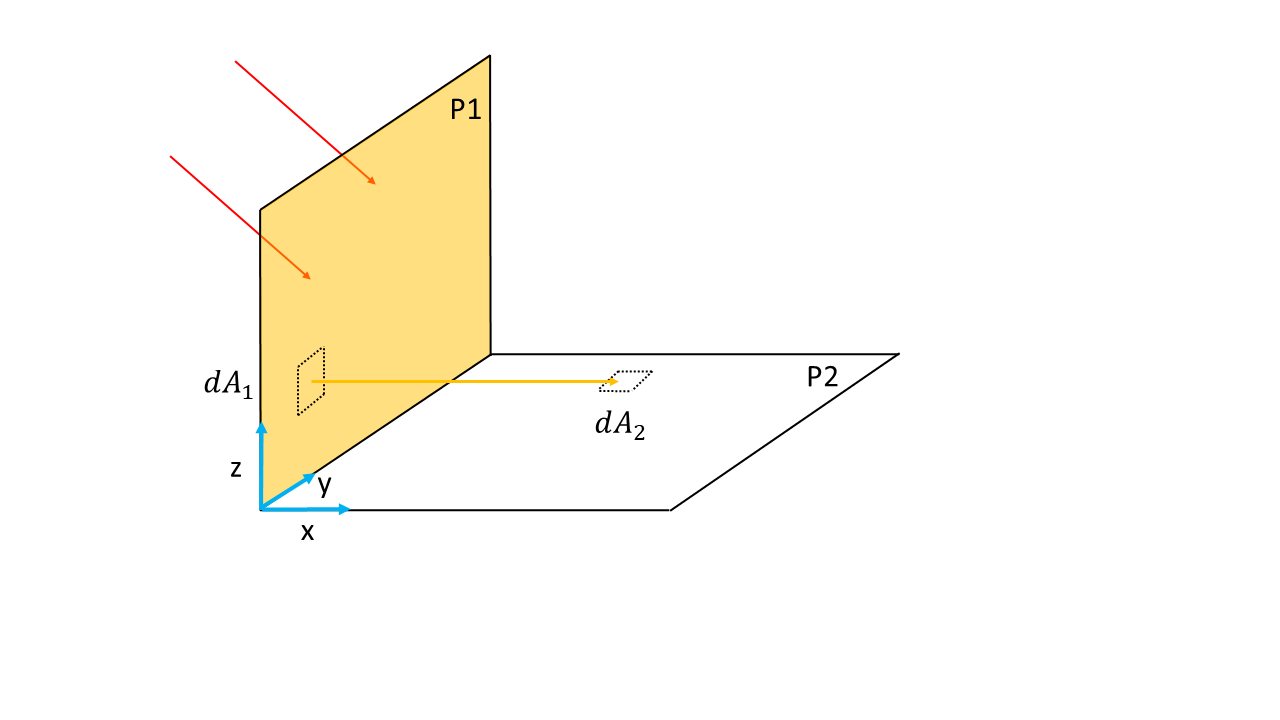

In [4]:
Image("Window2workingarea.png")

```{admonition} Questions
:class: full-width
Now we want to calculate the illuminance on the working plane P2. The previous drawing is again used for this purpose. Show that the location-dependent illuminance $E(x, y)$ can be expressed by the following integral

$$
    E(x_2, y_2) = L\, \int_0^b \int_{h_u}^{h_o} \frac{\text{cos}(\theta_1)\, \text{cos}(\theta_2)}{R^2(x_1, x_2, y_1, y_2, z_1)} dz_1\, dy_1
$$
$R$ is the distance between the two surfaces. $\theta_1$ and $\theta_2$ are the angles between the surface normals and the distance vector, respectively. $L$ is the luminance of the window.
```

## Solving the double-integral

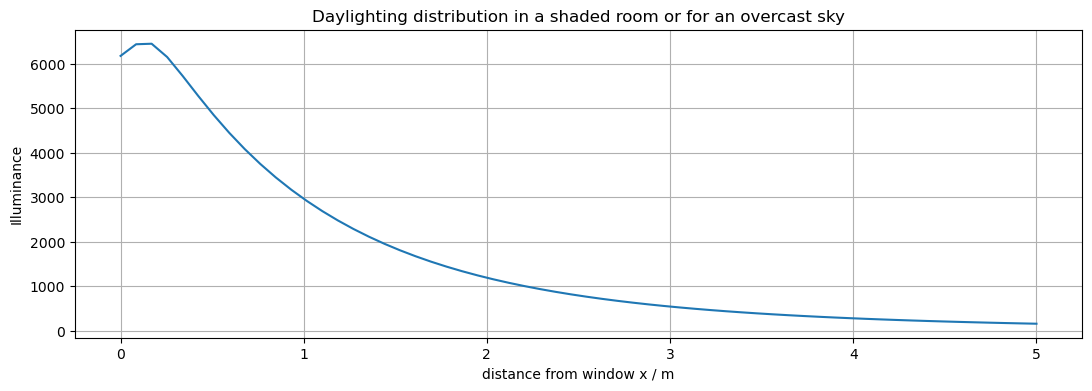

In [5]:
def E(z1, y1, x2, y2): # integrand
    x1 = 0
    eps = 1e-4
    x2 = x2 + eps
    y2 = y2 + eps
    R    = ((x1 - x2)**2 + (y1 - y2)**2 + z1**2)**0.5  # total distance
    R_xy = ((x1 - x2)**2 + (y1 - y2)**2)**0.5          # distance within the xy-plane
    cos1  = R_xy / R
    cos2  = z1 / R
    integrand = cos1 * cos2 / R**2

    return integrand

ax = 5 # depth
by = 4 # width
h  = 2 # max height above working plane

Nx, Ny = (60, 50)
x2 = np.linspace(0, ax, Nx) # discreditation
y2 = ax/2

L = 3200 # cd / m²
res_1D = np.zeros(Nx)
for nx, xx in enumerate(x2):
    r, err = integrate.dblquad(E, 0, by, 0.2, h, args=(xx, y2)) # numerical calculation of the integral
    res_1D[nx] = r * L       

fig = plt.figure(figsize=(13, 4))
plt.plot(x2, res_1D )#/ max(res_1D))
plt.title('Daylighting distribution in a shaded room or for an overcast sky')
#plt.ylabel('relative Illuminance')
plt.ylabel('Illuminance')
plt.xlabel('distance from window x / m')
plt.grid()
plt.show()

In [6]:
x2[24], res_1D[-1] / res_1D[24] * 300, res_1D[24], x2[59], x2[-1]

(2.0338983050847457, 41.745421764866805, 1159.8066522448398, 5.0, 5.0)

```{admonition} Questions
:class: full-width
Discuss the result:
- where should the desks be placed

- how much does the illuminance vary

- if you require an illuminance of 300 lx at 2 m, how high is $E$ at 5 m?
```

In [7]:
Nx, Ny = (int(10*ax), int(10*by))
x2 = np.linspace(0, ax, Nx)
y2 = np.linspace(0, by, Ny)

res_2D = np.zeros((Ny, Nx))
for nx, xx in enumerate(x2):
    for ny, yy in enumerate(y2):
        r, err = integrate.dblquad(E, 0, by, 0.2, h, args=(xx, yy))
        res_2D[ny, nx] = r

TypeError: 'norm' must be an instance of matplotlib.colors.Normalize or None, not a str

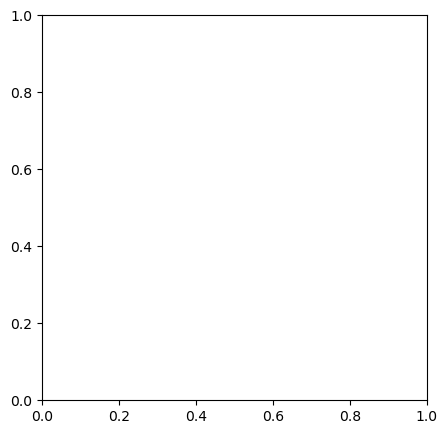

In [8]:
fig = plt.figure(figsize=(13, 5))
plt.imshow(res_2D / np.max(res_2D), extent = [0, ax, 0, by], norm='log', interpolation='bilinear', aspect='1', origin='lower')
plt.colorbar()
X, Y = np.meshgrid(x2, y2)
#levels = np.arange(0, 0.9, 0.2)
CS = plt.contour(X, Y, res_2D / np.max(res_2D))#, levels=levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('2D Distribution')
plt.ylabel('width, y')
plt.xlabel('depth, x')
plt.show()